___
# Titanic data set and the logistic Regression model

The dataset is  from the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). Using Logistic regression model to to predict a classification- survival or deceased.


## Import libraries and data
Let's import some libraries to get started!

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore the dataset

## Missing Data

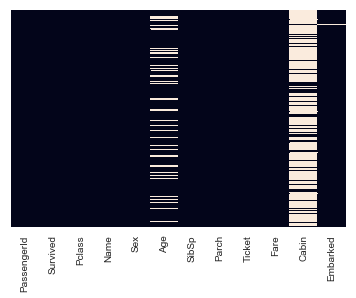

In [97]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

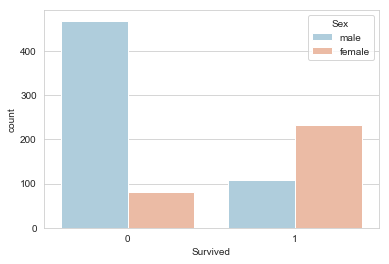

In [98]:
# Survived or deceased counts

sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

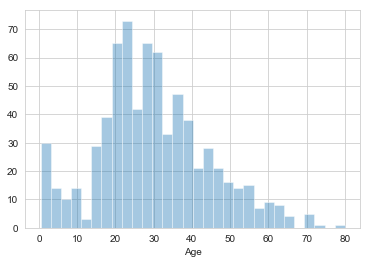

In [99]:
# Passenger age distibution
sns.distplot(df['Age'].dropna(),kde=False,bins=30)

___
## Data Cleaning

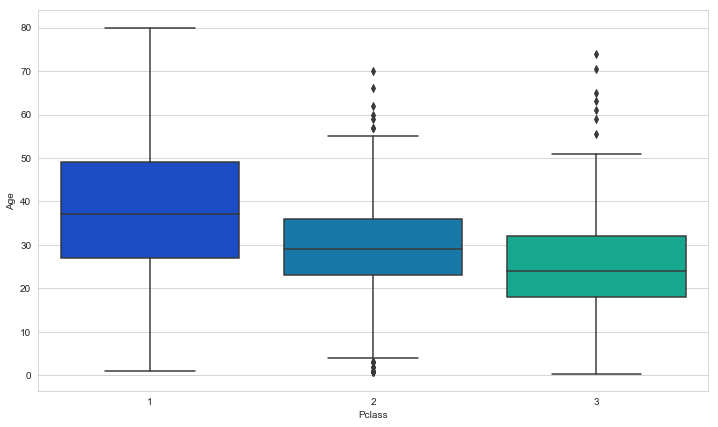

In [100]:
# The boxplot of the Age vs Pclass

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

Using these average age values to impute missing ages based on Pclass.

In [101]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

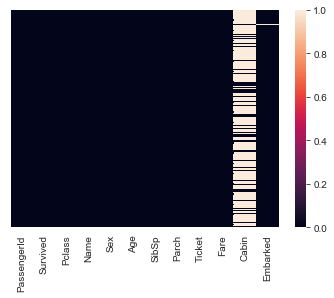

In [102]:
# Now apply that function!

df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(df.isnull(),yticklabels=False)

In [103]:
# Drop the Cabin column

df.drop('Cabin',axis=1,inplace=True)

## Converting Categorical Features 

Using Pandas to convert categorical features to dummy variables: Sex and Embarked

In [104]:
# dummy the 'Sex' and 'Embarked' columns

sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

#drop the text columns

df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [105]:
# concate the 'Sex' and Embark columns

df=pd.concat([df,sex,embark],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1



# Builde a Logistic Regression model


## Train Test Split

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.4,random_state=100)

## Training and Predicting

In [107]:
from sklearn.linear_model import LogisticRegression
logm=LogisticRegression()
logm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
predts=logm.predict(X_test)

## Evaluation

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predts))

             precision    recall  f1-score   support

          0       0.75      0.86      0.80       204
          1       0.77      0.63      0.69       153

avg / total       0.76      0.76      0.75       357



In [110]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predts))

[[175  29]
 [ 57  96]]
